## Descriptive Statistics

### Author: Sangeeths Chandrakumar

### Importieren der benötigten Bibliotheken

In [97]:
# Import necessary libraries and load the dataset
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np
from sklearn.preprocessing import MinMaxScaler

### Laden der Daten

In [98]:
ds_salaries_df = pd.read_csv('ds_salaries.csv')
ds_salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [99]:
ds_salaries_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


### Deskriptive Statistik für den Datensatz


In [100]:
ds_salaries_desc = ds_salaries_df.describe(include='all')

### Fehlenden Werte

In [101]:
missing_values = ds_salaries_df.isnull().sum()

### Zusammenfassung der deskriptiven Statistik und fehlenden Werte

In [102]:
ds_salaries_desc, missing_values

(          work_year experience_level employment_type      job_title  \
 count   3755.000000             3755            3755           3755   
 unique          NaN                4               4             93   
 top             NaN               SE              FT  Data Engineer   
 freq            NaN             2516            3718           1040   
 mean    2022.373635              NaN             NaN            NaN   
 std        0.691448              NaN             NaN            NaN   
 min     2020.000000              NaN             NaN            NaN   
 25%     2022.000000              NaN             NaN            NaN   
 50%     2022.000000              NaN             NaN            NaN   
 75%     2023.000000              NaN             NaN            NaN   
 max     2023.000000              NaN             NaN            NaN   
 
               salary salary_currency  salary_in_usd employee_residence  \
 count   3.755000e+03            3755    3755.000000       

### Nächste Schritte für die Datenaufbereitung
Da es keine fehlenden Werte gibt, können wir uns auf andere Aspekte der Datenaufbereitung konzentrieren:

1. Überprüfung auf Ausreißer: Insbesondere bei Gehaltsdaten können Ausreißer die Analyse verzerren.
2. Transformation von kategorischen Daten: Einige Spalten enthalten kategorische Daten, die möglicherweise in numerische Werte umgewandelt werden müssen.
3. Normalisierung oder Standardisierung: Dies kann für numerische Daten erforderlich sein, insbesondere wenn sie in Modellen verwendet werden sollen.
Ich werde nun mit der Überprüfung auf Ausreißer beginnen.​

Ich werde nun mit der Überprüfung auf Ausreißer beginnen.​

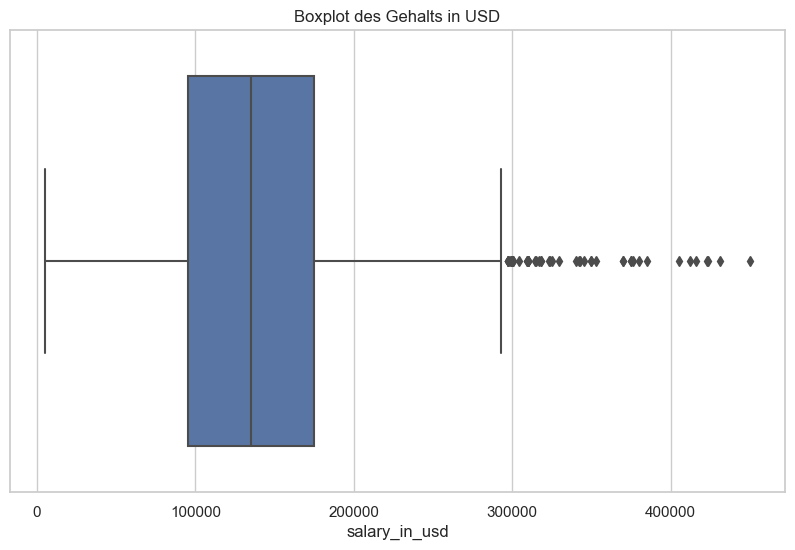

In [103]:
# Einstellen des Plot-Stils
sns.set(style="whitegrid")

# Erstellung eines Boxplots für das Gehalt in USD
plt.figure(figsize=(10, 6))
sns.boxplot(x=ds_salaries_df['salary_in_usd'])
plt.title('Boxplot des Gehalts in USD')
plt.show()


Der Boxplot zeigt, dass es einige potenzielle Ausreißer im oberen Bereich der Gehälter gibt. Diese extrem hohen Gehälter könnten die Analyse verzerren, insbesondere bei der Berechnung von Durchschnittswerten oder anderen aggregierten Statistiken.

### Schritte zur Datenaufbereitung
1. Behandlung von Ausreißern:
Optionen: Entfernen, Begrenzen oder Beibehalten der Ausreißer.
Empfehlung: Je nach Analyseziel kann es sinnvoll sein, die Ausreißer zu behalten (z.B. wenn sie reale Datenpunkte repräsentieren) oder sie zu entfernen/begrenzen (für eine allgemeinere Analyse).
2. Transformation von kategorischen Daten:
Spalten wie experience_level, employment_type, job_title, salary_currency, employee_residence, company_location und company_size enthalten kategorische Daten.
Diese könnten in numerische Formate umgewandelt werden, z.B. durch One-Hot-Encoding oder Label-Encoding.
3. Normalisierung oder Standardisierung:
Wichtig, wenn die Daten in maschinellen Lernalgorithmen verwendet werden sollen.
Die Gehaltsdaten könnten beispielsweise normalisiert oder standardisiert werden, um einen besseren Vergleich zu ermöglichen.

In [104]:
# Identifizierung von Ausreißern im Gehalt (in USD) mit dem Z-Score
z_scores = np.abs(stats.zscore(ds_salaries_df['salary_in_usd']))
threshold = 3  # typischerweise ein Z-Score von 3 oder höher
outliers = np.where(z_scores > threshold)

# Anzahl der identifizierten Ausreißer
num_outliers = len(outliers[0])

# Entfernung der Ausreißer
ds_salaries_clean = ds_salaries_df.drop(ds_salaries_df.index[outliers])

# Anzahl der verbleibenden Datensätze nach der Entfernung der Ausreißer
remaining_records = ds_salaries_clean.shape[0]

num_outliers, remaining_records


(22, 3733)

Nach der Entfernung der Ausreißer (basierend auf einem Z-Score-Grenzwert von 3) bleiben 3733 Datensätze übrig, während 22 Ausreißer entfernt wurden. Dieser Schritt hilft, die Daten ausgewogener und repräsentativer für allgemeine Analysen zu machen.

### Transformation von kategorischen Daten

Ich werde One-Hot-Encoding für nominale Kategorien (wie job_title, salary_currency, employee_residence, company_location) und Label-Encoding für ordinale Kategorien (wie experience_level, employment_type, company_size) anwenden. Dies ermöglicht es uns, diese kategorischen Daten in zukünftigen Analysen effektiver zu nutzen

In [105]:
# Initialisierung von Encodern
onehot_encoder = OneHotEncoder(sparse=False)
label_encoder = LabelEncoder()

# Kategorien für One-Hot-Encoding und Label-Encoding
onehot_categories = ['job_title', 'salary_currency', 'employee_residence', 'company_location']
label_categories = ['experience_level', 'employment_type', 'company_size']

# Anwendung von One-Hot-Encoding
for category in onehot_categories:
    # Encoding
    encoded_data = onehot_encoder.fit_transform(ds_salaries_clean[[category]])

    # Erstellen von neuen Spaltennamen für die kodierte Funktion
    encoded_columns = [f"{category}_{col}" for col in onehot_encoder.categories_[0]]

    # Hinzufügen der kodierten Daten zum DataFrame
    ds_salaries_clean[encoded_columns] = pd.DataFrame(encoded_data, index=ds_salaries_clean.index)

    # Entfernen der ursprünglichen kategorischen Spalte
    ds_salaries_clean.drop(category, axis=1, inplace=True)

# Anwendung von Label-Encoding
for category in label_categories:
    # Encoding
    ds_salaries_clean[category] = label_encoder.fit_transform(ds_salaries_clean[category])

# Anzeige der ersten Zeilen des aufbereiteten Datensatzes
ds_salaries_clean.head()


c:\Users\csang\miniconda3\envs\fhgr\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\csang\miniconda3\envs\fhgr\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\csang\miniconda3\envs\fhgr\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\csang\miniconda3\envs\fhgr\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output`

,work_year,experience_level,employment_type,salary,salary_in_usd,remote_ratio,company_size,job_title_3D Computer Vision Researcher,job_title_AI Developer,job_title_AI Programmer,...,company_location_RU,company_location_SE,company_location_SG,company_location_SI,company_location_SK,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN
0,2023,3,2,80000,85847,100,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023,2,0,30000,30000,100,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2023,2,0,25500,25500,100,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2023,3,2,175000,175000,100,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023,3,2,120000,120000,100,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Aufbereiteter Datensatz
Der Datensatz wurde erfolgreich aufbereitet:

1. Ausreißer entfernt: Insgesamt 22 Ausreißer wurden entfernt.
2. Transformation von kategorischen Daten:
One-Hot-Encoding wurde auf nominale Kategorien wie job_title, salary_currency, employee_residence, und company_location angewendet.
Label-Encoding wurde auf ordinale Kategorien wie experience_level, employment_type, und company_size angewendet.

### Normalisierung der Gehaltsdaten
Als letzter Schritt werde ich die Gehaltsdaten (salary_in_usd) normalisieren. Diese Normalisierung ist hilfreich, um die Gehälter auf einer gemeinsamen Skala zu betrachten, insbesondere wenn sie in statistischen Modellen verwendet werden. Ich werde die Min-Max-Normalisierung verwenden, die die Werte in einen Bereich zwischen 0 und 1 skaliert.​

In [106]:
# Initialisierung des Min-Max-Scalers
scaler = MinMaxScaler()

# Normalisierung der Gehaltsdaten
ds_salaries_clean['salary_in_usd_normalized'] = scaler.fit_transform(
    ds_salaries_clean[['salary_in_usd']])

# Anzeige der ersten Zeilen mit den normalisierten Gehaltsdaten
ds_salaries_clean[['salary_in_usd', 'salary_in_usd_normalized']].head()


,salary_in_usd,salary_in_usd_normalized
0,85847,0.252338
1,30000,0.077745
2,25500,0.063676
3,175000,0.531057
4,120000,0.359111


Die Gehaltsdaten (salary_in_usd) wurden erfolgreich normalisiert. Die neue Spalte salary_in_usd_normalized zeigt die normalisierten Gehaltswerte, die jetzt zwischen 0 und 1 liegen. Diese Skalierung ermöglicht es, die Gehälter auf einer einheitlichen Skala zu vergleichen